In [17]:


# from kaggle.api.kaggle_api_extended import KaggleApi
# import kagglehub
# import kaggle
# Initiliaze API




In [138]:

from sklearn import *
import pandas as pd
import seaborn as sns
# Donwload Dataset via API unzipped
# api.dataset_download_files(dataset="prathamtripathi/drug-classification", unzip=True)
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
lol_df = pd.read_csv("Challenger_Ranked_Games_15minute.csv")

In [129]:
lol_df

gameId  blueWins  blueTotalGolds  blueCurrentGolds  blueTotalLevel  \
0      4247263043         0           24081              1190              44   
1      4247155821         1           24162              2212              46   
2      4243963257         0           22413              1563              41   
3      4241678498         0           23837              3197              46   
4      4241538868         1           27688              3663              44   
...           ...       ...             ...               ...             ...   
26829  4143231833         0           26110              1535              46   
26830  4157911901         0           57503              3293              62   
26831  3764171638         0           26091              2986              47   
26832  4110201724         1           24734              4289              45   
26833  4100240254         1           27507              5647              45   

       blueAvgLevel  blueTotalMinionKills  blueTotalJungleMinionKills  \
0               8.8                   309                          74   
1               9.2                   393                          64   
2               8.2                   300                          62   
3               9.2                   370                          96   
4               8.8                   381                          66   
...             ...                   ...                         ...   
26829           9.2                   289                          73   
26830          12.4                   329                          28   
26831           9.4                   338                          86   
26832           9.0                   328                          64   
26833           9.0                   377                          85   

       blueFirstBlood  blueKill  ...  redFirstTowerLane  redTowerKills  \
0                   0         8  ...       ['MID_LANE']              2   
1                   0         5  ...       ['TOP_LANE']              1   
2                   0         5  ...       ['BOT_LANE']              4   
3                   0         6  ...       ['TOP_LANE']              1   
4                   0         9  ...       ['BOT_LANE']              2   
...               ...       ...  ...                ...            ...   
26829               0        15  ...       ['BOT_LANE']              1   
26830               0        27  ...                 []              6   
26831               0         7  ...                 []              0   
26832               0        11  ...       ['BOT_LANE']              1   
26833               0         8  ...                 []              0   

       redMidTowerKills  redTopTowerKills  redBotTowerKills  redInhibitor  \
0                     1                 0                 1             0   
1                     0                 1                 0             0   
2                     2                 1                 1             0   
3                     0                 1                 0             0   
4                     1                 0                 1             0   
...                 ...               ...               ...           ...   
26829                 0                 0                 1             0   
26830                 2                 1                 3             1   
26831                 0                 0                 0             0   
26832                 0                 0                 1             0   
26833                 0                 0                 0             0   

      redFirstDragon                     redDragnoType  redDragon  \
0                  1  ['WATER_DRAGON', 'EARTH_DRAGON']          2   
1                  0                                []          0   
2                  1   ['FIRE_DRAGON', 'EARTH_DRAGON']          2   
3                  0                                []          0   
4 

In [132]:
lol_df['redFirstBlood'].unique()

array([0])

In [142]:
lol_df = lol_df.drop(columns=['redDragnoType', 'blueDragnoType', 'redFirstBlood', 'blueFirstBlood'])
lol_df = lol_df.drop_duplicates()

In [144]:
lol_df = pd.get_dummies(lol_df)

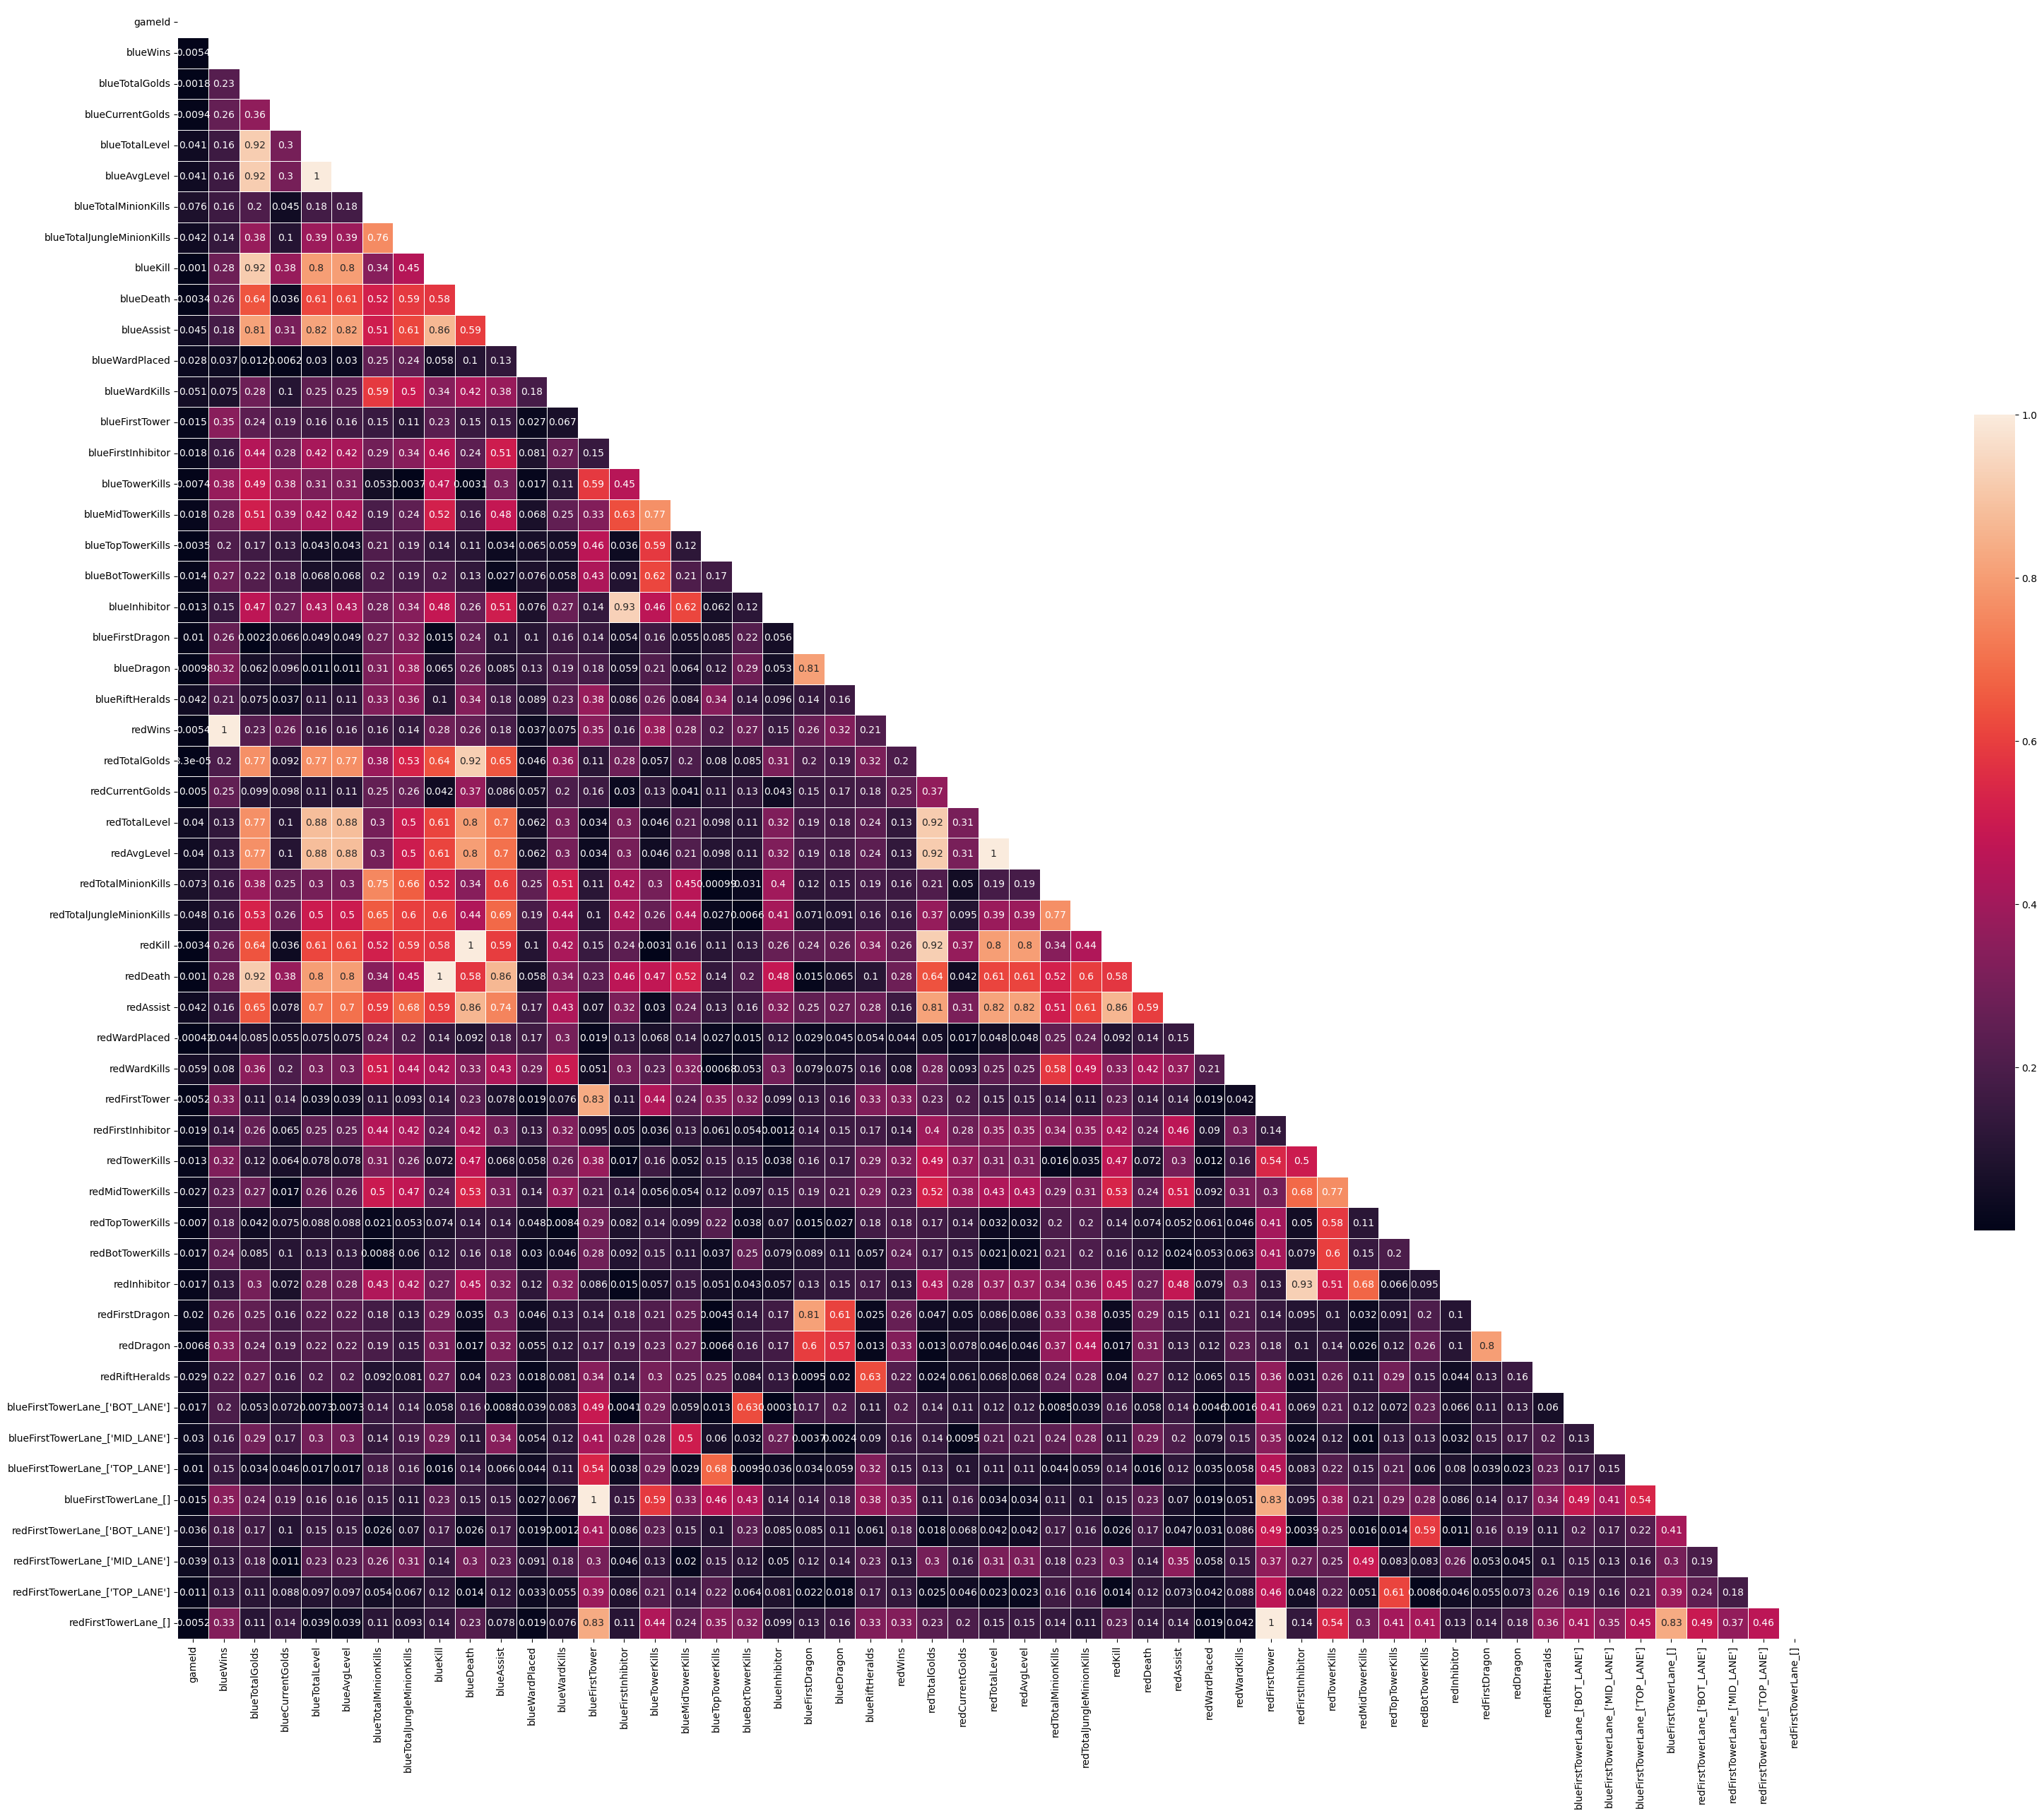

In [146]:
corr=np.abs(lol_df.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

#lol_df = data.iloc[:, :50] 

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(60, 30))

plt.xticks(rotation=90)
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [110]:
lol_df.corr()

gameId  blueWins  blueTotalGolds  \
gameId                           1.000000 -0.005474        0.002210   
blueWins                        -0.005474  1.000000        0.224901   
blueTotalGolds                   0.002210  0.224901        1.000000   
blueCurrentGolds                -0.009132  0.261419        0.361081   
blueTotalLevel                   0.041227  0.161834        0.919460   
blueAvgLevel                     0.041227  0.161834        0.919460   
blueTotalMinionKills            -0.077160  0.160471       -0.204588   
blueTotalJungleMinionKills      -0.042763  0.137586       -0.378815   
blueFirstBlood                        NaN       NaN             NaN   
blueKill                         0.001603  0.279008        0.917647   
blueDeath                       -0.002826 -0.257305        0.644921   
blueAssist                       0.045411  0.181491        0.813956   
blueWardPlaced                  -0.028086  0.037053       -0.012788   
blueWardKills                   -0.051985  0.074630       -0.285355   
blueFirstTower                   0.014555  0.347103        0.238120   
blueFirstInhibitor               0.018564  0.159124        0.442528   
blueTowerKills                   0.007106  0.378512        0.489645   
blueMidTowerKills                0.018373  0.277362        0.513938   
blueTopTowerKills                0.003004  0.204657        0.169933   
blueBotTowerKills               -0.014258  0.274001        0.216634   
blueInhibitor                    0.013421  0.150441        0.465528   
blueFirstDragon                 -0.010380  0.262592        0.001380   
blueDragon                       0.000683  0.324633        0.061232   
blueRiftHeralds                  0.041239  0.212824       -0.075891   
redWins                          0.005474 -1.000000       -0.224901   
redTotalGolds                    0.000528 -0.201344        0.771108   
redCurrentGolds                  0.005483 -0.253267        0.098951   
redTotalLevel                    0.040395 -0.130478        0.770900   
redAvgLevel                      0.040395 -0.130478        0.770900   
redTotalMinionKills             -0.073218 -0.156655       -0.383234   
redTotalJungleMinionKills       -0.048347 -0.155438       -0.530656   
redFirstBlood                         NaN       NaN             NaN   
redKill                         -0.002826 -0.257305        0.644921   
redDeath                         0.001603  0.279008        0.917647   
redAssist                        0.042910 -0.157069        0.650016   
redWardPlaced                    0.000153 -0.043594       -0.084984   
redWardKills                    -0.059530 -0.079818       -0.355886   
redFirstTower                    0.005318 -0.331914       -0.106891   
redFirstInhibitor                0.019058 -0.135008        0.261740   
redTowerKills                    0.013316 -0.323409        0.121757   
redMidTowerKills                 0.027252 -0.226201        0.267329   
redTopTowerKills                 0.006585 -0.179915       -0.042462   
redBotTowerKills                -0.017607 -0.235856       -0.085142   
redInhibitor                     0.017860 -0.127347        0.299558   
redFirstDragon                  -0.020424 -0.263398       -0.247904   
redDragon                       -0.007248 -0.328984       -0.237225   
redRiftHeralds                   0.028790 -0.218904       -0.265821   
blueFirstTowerLane_['BOT_LANE'] -0.016731  0.197901        0.052312   
blueFirstTowerLane_['MID_LANE']  0.030655  0.156899        0.286388   
blueFirstTowerLane_['TOP_LANE']  0.009857  0.149799        0.033549   
blueFirstTowerLane_[]           -0.014555 -0.347103       -0.238120   
redFirstTowerLane_['BOT_LANE']  -0.035900 -0.181056       -0.168395   
redFirstTowerLane_['MID_LANE']   0.039208 -0.128704        0.177383   
redFirstTowerLane_['TOP_LANE']   0.010903 -0.129188       -0.113013   
redFirstTowerLane_[]            -0.005318  0.331914        0.106891   

                                 blueCurrentGolds  blueTot

In [ ]:
#wins target

In [33]:
# Count the number of differences
difference_count = (lol_df['blueWins'] != lol_df['redWins']).sum()

print(f"Number of differences: {difference_count}")


Number of differences: 26834


In [ ]:
lol_df = lol_df.drop(columns=['redDragnoType', 'blueDragnoType', 'blueWins', 'redWins'])

In [81]:
lol_df

gameId  blueTotalGolds  blueCurrentGolds  blueTotalLevel  \
0      4247263043           24081              1190              44   
1      4247155821           24162              2212              46   
2      4243963257           22413              1563              41   
3      4241678498           23837              3197              46   
4      4241538868           27688              3663              44   
...           ...             ...               ...             ...   
26829  4143231833           26110              1535              46   
26830  4157911901           57503              3293              62   
26831  3764171638           26091              2986              47   
26832  4110201724           24734              4289              45   
26833  4100240254           27507              5647              45   

       blueAvgLevel  blueTotalMinionKills  blueTotalJungleMinionKills  \
0               8.8                   309                          74   
1               9.2                   393                          64   
2               8.2                   300                          62   
3               9.2                   370                          96   
4               8.8                   381                          66   
...             ...                   ...                         ...   
26829           9.2                   289                          73   
26830          12.4                   329                          28   
26831           9.4                   338                          86   
26832           9.0                   328                          64   
26833           9.0                   377                          85   

       blueFirstBlood  blueKill  blueDeath  ...  redDragon  redRiftHeralds  \
0                   0         8         14  ...          2               1   
1                   0         5          6  ...          0               0   
2                   0         5         20  ...          2               1   
3                   0         6         13  ...          0               1   
4                   0         9         10  ...          0               0   
...               ...       ...        ...  ...        ...             ...   
26829               0        15         14  ...          1               1   
26830               0        27         37  ...          0               0   
26831               0         7          6  ...          0               0   
26832               0        11          7  ...          1               0   
26833               0         8          2  ...          1               0   

       blueFirstTowerLane_['BOT_LANE']  blueFirstTowerLane_['MID_LANE']  \
0                                False                            False   
1                                False                            False   
2                                False                            False   
3                                False                            False   
4                                False                            False   
...                                ...                              ...   
26829                            False                            False   
26830                            False                            False   
26831                            False                            False   
26832                            False                            False   
26833                            False                            False   

       blueFirstTowerLane_['TOP_LANE']  blueFirstTowerLane_[]  \
0                                False                   True   
1                                False                   True   
2                                False                   True   
3                                False                   True   
4                                False                   True   
...                                ...               

In [85]:
lol_df.shape

(26834, 53)

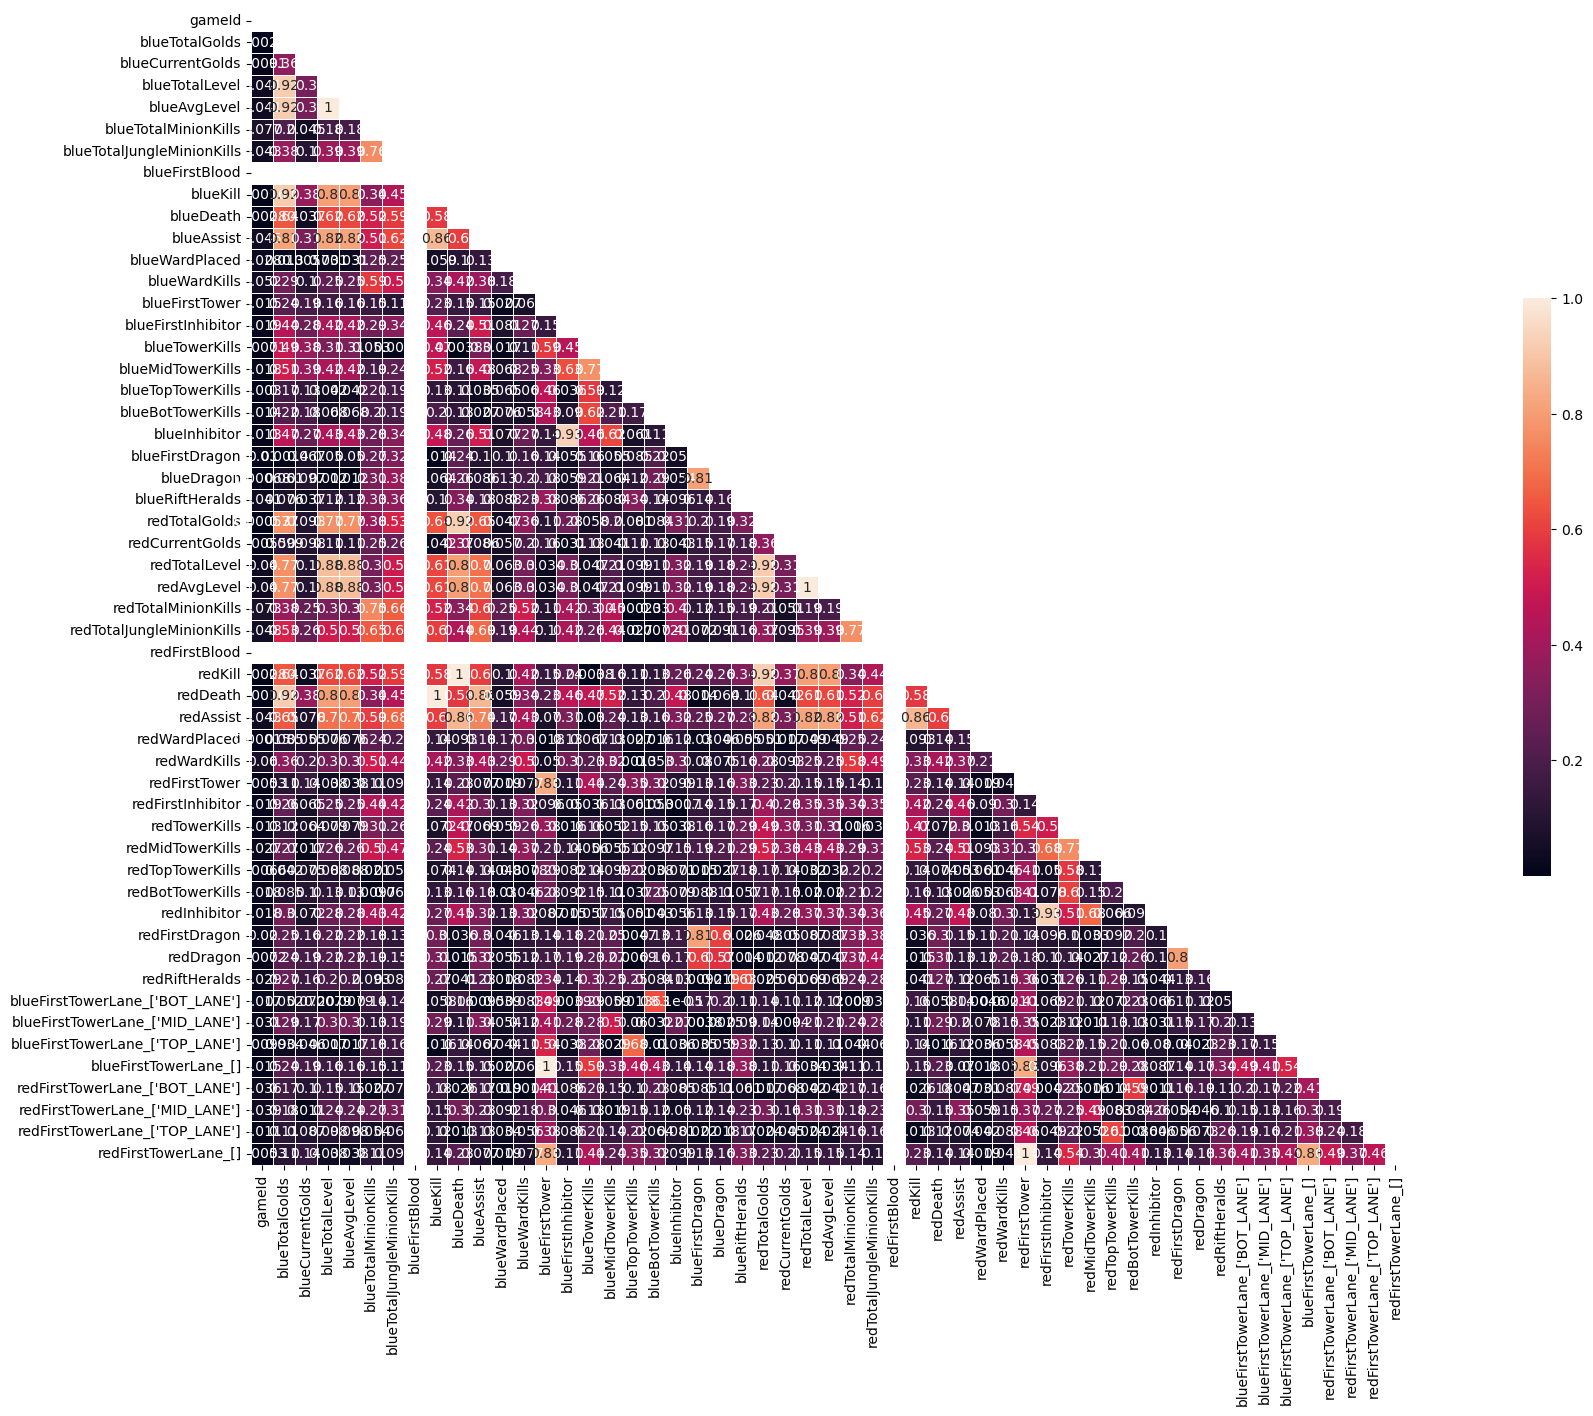

In [87]:
corr=np.abs(lol_df.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

#lol_df = data.iloc[:, :50] 

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 15))

plt.xticks(rotation=90)
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()